# Preço de Ações da Apple

O Conjunto de Dados de Preços de Ações da Apple é uma coleção abrangente de dados históricos que rastreia o desempenho das ações da Apple ao longo do tempo. Compreende uma gama diversificada de informações cruciais, como os preços de abertura, fechamento, máximo e mínimo das ações, além do volume de negociação e ajustes de dividendos.

Utilizando esses dados disponíveis no Kaggle, uma análise detalhada foi conduzida com o objetivo de prever as futuras vendas do mercado, os preços das ações e os seus fechamentos. Essa análise visa responder às seguintes questões:

> Quais são as tendências predominantes no mercado?

> Em que época o mercado registra o maior volume de vendas?

----------------------------------------------------------------------------------------------------------------

## Preparando Ambiente

Conjunto de importações para configurar um ambiente completo para manipulação e análise de dados.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yt
from statsmodels.tsa.seasonal import seasonal_decompose

Leitura do arquivo csv onde contém os dados utilizando Pandas.



In [4]:
data = pd.read_csv('Apple Dataset.csv', index_col='Date')
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097335,48630400
1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102072,37363200
1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106380,46950400
1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111978,48003200


Explorando o conjunto de dados.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10954 entries, 1980-12-12 to 2024-05-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10954 non-null  float64
 1   High       10954 non-null  float64
 2   Low        10954 non-null  float64
 3   Close      10954 non-null  float64
 4   Adj Close  10954 non-null  float64
 5   Volume     10954 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 599.0+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10954.000000,10954.000000,10954.000000,10954.000000,10954.000000,1.095400e+04
mean,21.530877,21.761904,21.308220,21.544072,20.747506,3.190792e+08
std,44.458386,44.931856,44.013578,44.492483,44.038943,3.357446e+08
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,0.296875,0.303571,0.290179,0.296875,0.241624,1.139936e+08
50%,0.522321,0.533482,0.513393,0.524554,0.427333,2.067128e+08
75%,19.767500,19.888572,19.457768,19.682679,17.048054,3.993444e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09


In [7]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600


In [8]:
data[['Close']].head()

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


## Visualização

Vamos extrair as colunas mais importantes do DataFrame para visualização e melhor interpretação.

In [9]:
data.reset_index(inplace=True)

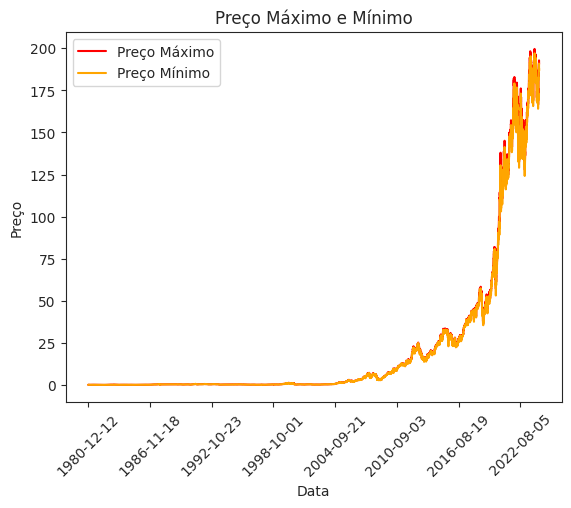

In [10]:
with sns.axes_style('ticks'):
  grafico = sns.lineplot(x='Date', y='High', data=data, label='Preço Máximo', color='red')
  sns.lineplot(x='Date', y='Low', data=data, label='Preço Mínimo', color='orange')
  grafico.set(title='Preço Máximo e Mínimo', xlabel='Data', ylabel='Preço')
  plt.xticks(rotation=45)
  plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))

# exibição do gráfico
plt.show()

* Podemos observar através do gráfico que a partir de 2003 houve um notável aumento nas vendas, indicando uma demanda crescente pelos produtos. Desde então, a empresa tem experimentado uma demanda cada vez maior por seus produtos, o que sugere um fortalecimento de sua posição no mercado.

Visualização da **abertura** e **fechamento**.

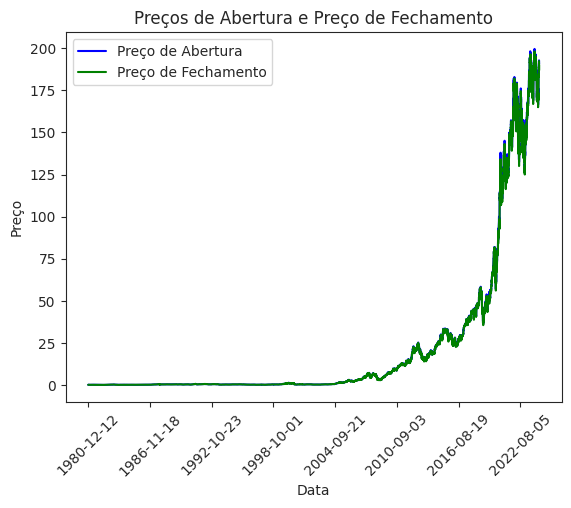

In [11]:
with sns.axes_style('ticks'):
  grafico = sns.lineplot(x='Date', y='High', data=data, label='Preço de Abertura', color='blue')
  sns.lineplot(x='Date', y='Close', data=data, label='Preço de Fechamento', color='green')
  grafico.set(title='Preços de Abertura e Preço de Fechamento', xlabel='Data', ylabel='Preço')
  plt.xticks(rotation=45)
  plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))

* Ao gerar os dois gráficos, observa-se uma correlação entre as variáveis. Essa relação sugere uma influência mútua entre essas variáveis e destaca a importância de monitorar o comportamento do preço máximo e mínimo ao analisar o desempenho das ações da Apple.

**Mapa de calor**

Indentificar correlações entre outras variáveis para comportamentos futuros.

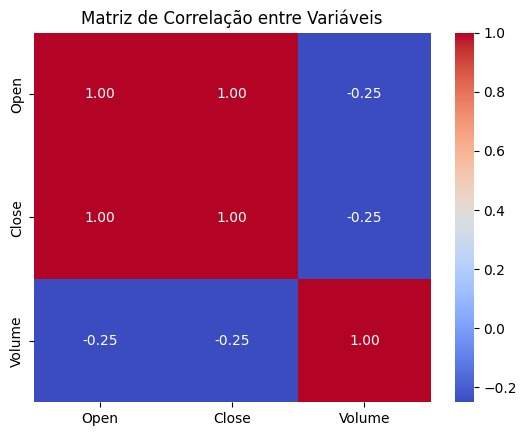

In [12]:
correlation_matrix = data[['Open', 'Close', 'Volume']].corr()

# mapa de calor para visualizar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

* Sem dúvida, há uma forte correlação entre as variáveis selecionadas, sugerindo uma tendência de alta robusta. Isso indica um alto nível de interesse e atividade no mercado, com muitos investidores negociando ações da Apple.

-----------------------------------------------

## Identificando Tendências Futuras

**Média Móvel**

A média móvel suaviza as flutuações de curto prazo nos dados, permitindo uma visualização mais clara das tendências de longo prazo. Com base nas tendências encontradas, podemos identificar previsões do comportamento futuro dos dados.

In [13]:
media_movel181d = data['Close'].rolling(181).mean()
media_movel365d = data['Close'].rolling(365).mean()

In [14]:
print("Estatísticas Descritivas - Média Móvel 181 Dias:")
print(media_movel181d.describe())

Estatísticas Descritivas - Média Móvel 181 Dias:
count    10774.000000
mean        20.394013
std         42.158354
min          0.071009
25%          0.314543
50%          0.501353
75%         19.122430
max        184.719669
Name: Close, dtype: float64


In [15]:
print("Estatísticas Descritivas - Média Móvel 365 Dias:")
print(media_movel365d.describe())

Estatísticas Descritivas - Média Móvel 365 Dias:
count    10590.000000
mean        19.195301
std         39.558821
min          0.084898
25%          0.321583
50%          0.531147
75%         18.609918
max        173.092247
Name: Close, dtype: float64


In [16]:
# calcular a diferença da média móvel para detectar tendência
cruzamento = media_movel181d > media_movel365d

print("Sinais de Cruzamento (7d > 21d):")
print(cruzamento)

Sinais de Cruzamento (7d > 21d):
0        False
1        False
2        False
3        False
4        False
         ...  
10949     True
10950     True
10951     True
10952     True
10953     True
Name: Close, Length: 10954, dtype: bool


In [17]:
correlacao = data['Close'].corr(media_movel365d)
print(correlacao)

0.987661452475761


In [18]:
# desvio entre preço de fechamento e média móvel de 365 dias
desvio = data['Close'] - media_movel365d

print("Desvios do Preço de Fechamento em Relação à Média Móvel de 21 Dias:")
print(desvio)

Desvios do Preço de Fechamento em Relação à Média Móvel de 21 Dias:
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
10949    18.472267
10950    19.646828
10951    18.059939
10952    13.918772
10953    16.887749
Name: Close, Length: 10954, dtype: float64


* Calculando os dados, podemos identificar tendências positivas em relação ao fechamento, o que é essencial, pois ele é o principal indicador que determina o comportamento do mercado.

**Decomposição**

Vamos finalizar a primeira análise com a decomposição. Os dados é dividido em partes menores, mais simples e mais gerenciáveis, a fim de entender melhor os padrões, tendências e ciclos presentes nos dados.

In [19]:
decomposicao= seasonal_decompose(data[['Close']], model= 'additive', period=30, extrapolate_trend=30)

In [20]:
decomposicao.trend.iloc[0:5]

0    0.157488
1    0.156659
2    0.155830
3    0.155001
4    0.154172
Name: trend, dtype: float64

In [21]:
max(decomposicao.resid)

16.082070188191693

In [22]:
min(decomposicao.resid)

-14.873939946176474

In [23]:
max(decomposicao.trend)

192.88050026666673

In [24]:
min(decomposicao.trend)

0.056938399999971606

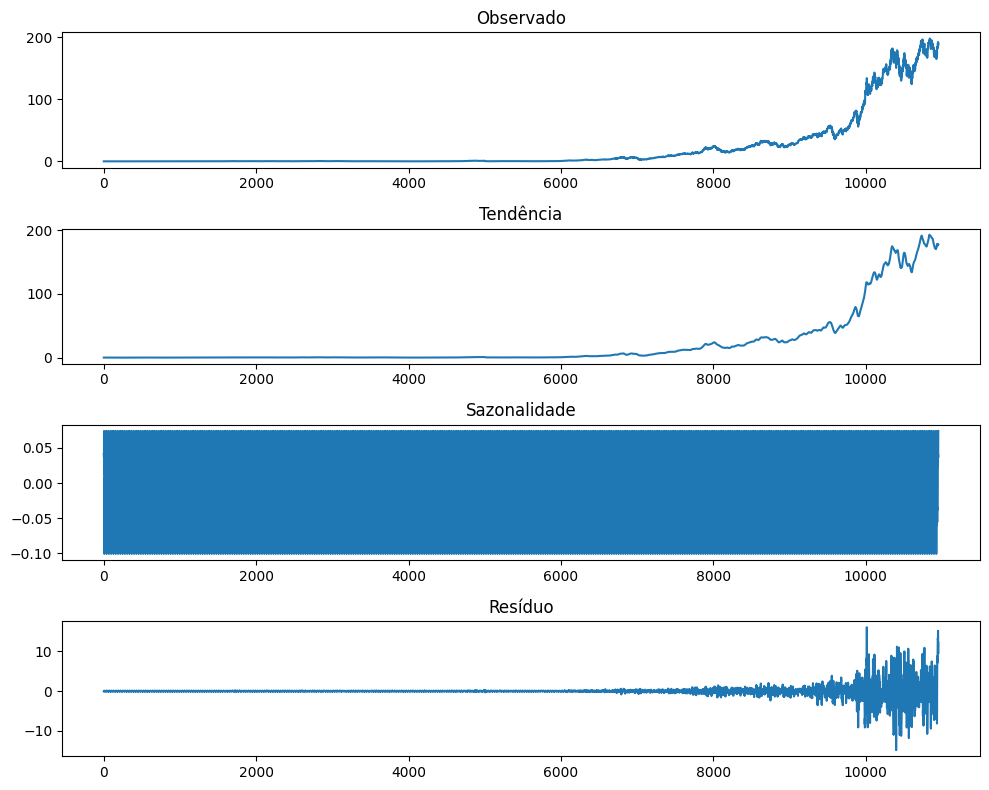

In [25]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,8))

# plotar os componentes da decomposição
decomposicao.observed.plot(ax=axs[0], title='Observado')
decomposicao.trend.plot(ax=axs[1], title='Tendência')
decomposicao.seasonal.plot(ax=axs[2], title='Sazonalidade')
decomposicao.resid.plot(ax=axs[3], title='Resíduo')

# ajustar o layout dos subplots
plt.tight_layout()
plt.show()

* Observando os dados, notamos uma tendência de aumento ou manutenção nas vendas, sendo improvável uma redução, a menos que ocorra uma crise ou algum evento significativo no mercado. A alta correlação entre os dados sugere que as vendas podem continuar em uma trajetória positiva ou permanecer estáveis no futuro próximo.

-----------------------------------------------------

## Identificando o Pico de Vendas

In [26]:
# implementando a variável ano e mes no DataFrame para melhor analise
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [27]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,1980,12
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,1980,12
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,1980,12
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,1980,12
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,1980,12


In [28]:
# extrair o mês e o ano das datas
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# calcular o volume total de vendas por mês e por ano
vendas_mensais = data.groupby('Month')['Volume'].sum()
vendas_anuais = data.groupby('Year')['Volume'].sum()

# encontrar o mês e o ano com o maior volume de vendas
melhor_mes = vendas_mensais.idxmax()
melhor_ano = vendas_anuais.idxmax()

print(f"Melhor mês de vendas: {melhor_mes}")
print(f"Melhor ano de vendas: {melhor_ano}")

Melhor mês de vendas: 1
Melhor ano de vendas: 2008


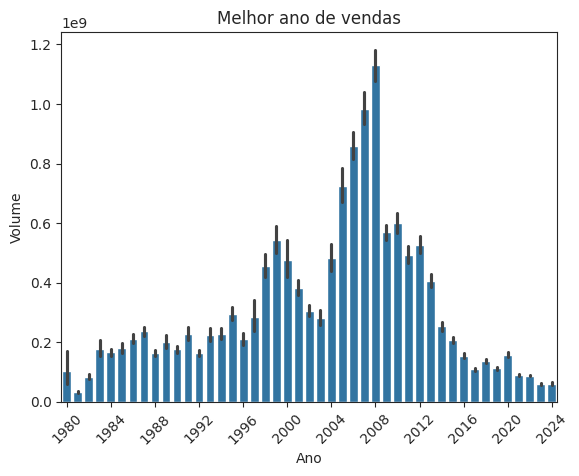

In [29]:
with sns.axes_style('ticks'):
    grafico = sns.barplot(x='Year', y='Volume', data=data)
    grafico.set(title='Melhor ano de vendas', xlabel='Ano', ylabel='Volume')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))

plt.show()

<Figure size 1200x600 with 0 Axes>

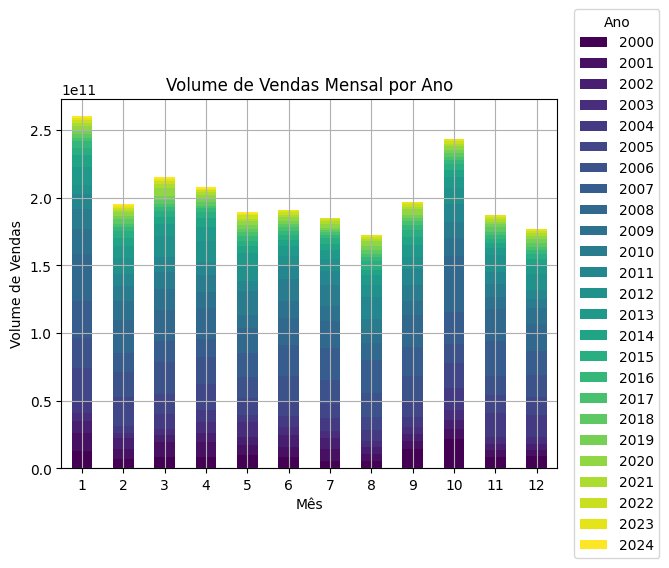

In [30]:
data = data[(data['Date'].dt.year >= 2000) & (data['Date'].dt.year <= 2024)]
monthly_sales = data.groupby(['Year', 'Month'])['Volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
monthly_sales.pivot(index='Month', columns='Year', values='Volume').plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Volume de Vendas Mensal por Ano')
plt.xlabel('Mês')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=0)
plt.legend(title='Ano', loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.grid(True)
plt.show()

* Em 2008, a Apple registrou um pico extraordinário nas vendas, com janeiro destacando-se como o melhor mês de vendas. Desde então, observou-se uma tendência de queda nas vendas, o que pode ser atribuído a uma variedade de fatores, incluindo flutuações de preços e crises de mercado.